**This notebook help pre-process the dataset with following steps:**

- Separate each post.
- Clean redundant content in posts.
- Separate type into four subtype.

**with pickle,**

`Preprocessed dataframe is stored as df.pk`

`Preprocessed tf-idf(term-frequency times inverse document-frequency) dataframe is stored as tfidf_df.pk`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pk
from utilities import clean_posts
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

dataset = "../dataset/mbti-type/mbti_1.csv"

### 1 Load and preprocess

In [2]:
# Load data & Separate posts
df = pd.read_csv(dataset)
sep_posts = [df['posts'][i].split('|||') for i in range(df.shape[0])]
df = pd.concat([df['type'], pd.Series(sep_posts, name="sep_posts")], axis=1)
df.head()

,type,sep_posts
0,INFJ,"['http://www.youtube.com/watch?v=qsXHcwe3krw, ..."
1,ENTP,['I'm finding the lack of me in these posts ve...
2,INTP,['Good one _____ https://www.youtube.com/wa...
3,INTJ,"['Dear INTP, I enjoyed our conversation the ..."
4,ENTJ,"['You're fired., That's another silly misconce..."


In [3]:
df.sep_posts = df.sep_posts.apply(lambda x: ' '.join(x))
df.sep_posts = df.sep_posts.apply(clean_posts)

In [4]:
df['IE'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
df['NS'] = df['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
df['TF'] = df['type'].apply(lambda x: 1 if x[2] == 'F' else 0)
df['JP'] = df['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

### 2 Build Vectorizer

Vectorizer is built with:
- `CountVectorizer`

- `TfidfTransformer`

in `sklearn.feature_extraction.text`.

<BarContainer object of 16 artists>

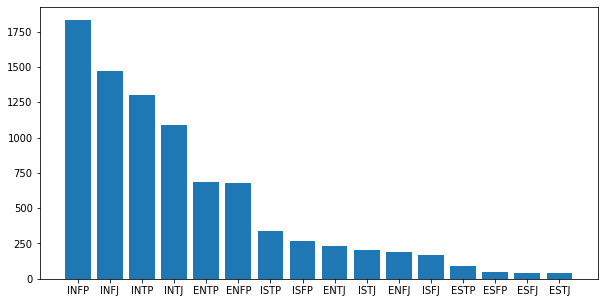

In [5]:
# Plot and observe the distribution
types = df.type.value_counts()
types_name = list(map(lambda x:(x+'s').lower(), types.index))
types_name += list(map(lambda x:x.lower(), types.index))
stop_words = ['and','the','to','of'] + types_name

plt.figure(figsize=(10,5))
plt.bar(types.index, types.values)

In [6]:
# Init Vectorizer
Vectorizer = CountVectorizer(stop_words=stop_words, 
                             max_features=2000,
                             analyzer="word",
                             max_df=0.8, min_df=0.1)

In [7]:
# Build term-document matrix
corpus = df.sep_posts.values.reshape(1,-1).tolist()[0]
td_matrix = Vectorizer.fit_transform(corpus).toarray()

In [8]:
# Transform a count matrix to a normalized 
# (1) term-frequency or 
# (2) term-frequency times inverse document-frequency 
# representation.

Transformer = TfidfTransformer()
tfidf_matrix = Transformer.fit_transform(td_matrix).toarray()
tfidf_df = pd.DataFrame(tfidf_matrix, columns=Vectorizer.get_feature_names())

In [9]:
tfidf_df_IE = pd.concat([tfidf_df, df['IE']], axis=1)
tfidf_df_NS = pd.concat([tfidf_df, df['NS']], axis=1)
tfidf_df_TF = pd.concat([tfidf_df, df['TF']], axis=1)
tfidf_df_JP = pd.concat([tfidf_df, df['JP']], axis=1)

### 3 Storage

In [10]:
# Store Vectorizer and Transformer
with open('pickles/Vectorizer.pk', 'wb') as pkl:
    pk.dump(Vectorizer, pkl)

with open('pickles/Transformer.pk', 'wb') as pkl:
    pk.dump(Transformer, pkl)

In [11]:
# Store dataframes
with open('pickles/tfidf_df_IE.pk', 'wb') as pkl:
    pk.dump(tfidf_df_IE, pkl)

with open('pickles/tfidf_df_NS.pk', 'wb') as pkl:
    pk.dump(tfidf_df_NS, pkl)

with open('pickles/tfidf_df_TF.pk', 'wb') as pkl:
    pk.dump(tfidf_df_TF, pkl)

with open('pickles/tfidf_df_JP.pk', 'wb') as pkl:
    pk.dump(tfidf_df_JP, pkl)

In [12]:
# Store dataframe
with open('pickles/df.pk', 'wb') as pkl:
    pk.dump(df, pkl)

with open('pickles/tfidf_df.pk', 'wb') as pkl:
    pk.dump(tfidf_df, pkl)

In [13]:
# Store csv
df.to_csv('pickles/sep_mbti.csv', index=False)